<h1>Day Eight

<h2>Load and visualize dataset

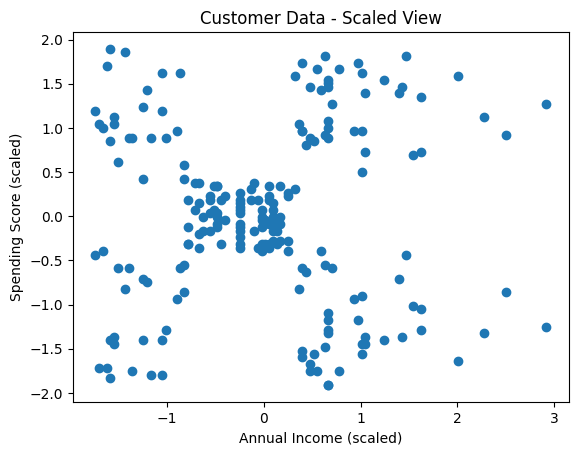

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


data = pd.read_csv(r"C:\Users\ashiv\Desktop\AI and ML\Day Eight\Mall_Customers.csv")


X = data[['Annual Income (k$)', 'Spending Score (1-100)']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.title("Customer Data - Scaled View")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()

<h2>Fit K-Means and assign cluster labels

In [3]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)


data['Cluster'] = kmeans.labels_
print(data[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())


   Annual Income (k$)  Spending Score (1-100)  Cluster
0                  15                      39        4
1                  15                      81        2
2                  16                       6        4
3                  16                      77        2
4                  17                      40        4


c:\Users\ashiv\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ashiv\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\ashiv\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ashiv\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1039

<h2>Use the Elbow Method to find optimal K

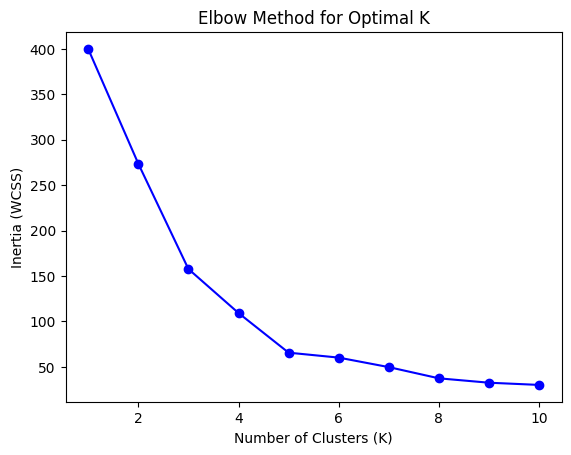

In [ ]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)


plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()


<h2>Visualize clusters with color-coding

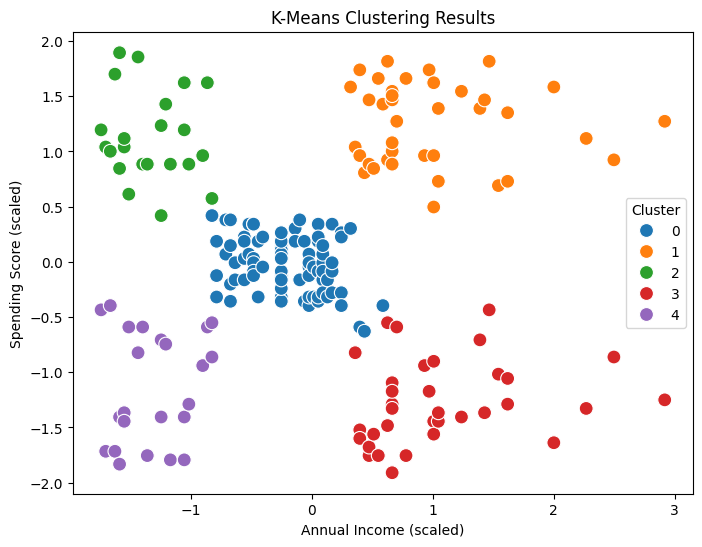

In [5]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_scaled[:, 0], y=X_scaled[:, 1],
    hue=data['Cluster'], palette='tab10', s=100
)
plt.title('K-Means Clustering Results')
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend(title="Cluster")
plt.show()


<h2>Evaluate clustering using Silhouette Score

In [6]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score for K=5: {score:.4f}")


Silhouette Score for K=5: 0.5547
